In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 2*x**3 - 2*x**2 - 35*x + 6

In [ ]:
xs = np.arange(-5, 5, 0.25)
f(xs)

array([-119.     ,  -87.21875,  -59.25   ,  -34.90625,  -14.     ,
          3.65625,   18.25   ,   29.96875,   39.     ,   45.53125,
         49.75   ,   51.84375,   52.     ,   50.40625,   47.25   ,
         42.71875,   37.     ,   30.28125,   22.75   ,   14.59375,
          6.     ,   -2.84375,  -11.75   ,  -20.53125,  -29.     ,
        -36.96875,  -44.25   ,  -50.65625,  -56.     ,  -60.09375,
        -62.75   ,  -63.78125,  -63.     ,  -60.21875,  -55.25   ,
        -47.90625,  -38.     ,  -25.34375,   -9.75   ,    8.96875])

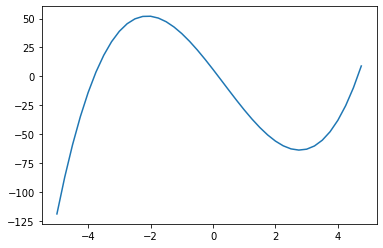

In [ ]:
plt.plot(xs, f(xs))

In [ ]:
h = 0.001
x = -2.0
print(f(x))
print(f(x+h))
print((f(x+h)-f(x))/h)
x = 3.0
print(f(x))
print(f(x+h))

print((f(x+h)-f(x))/h)

52.0
51.996986002
-3.0139980000001287
-63.0
-62.992983998
7.016002000000299


In [ ]:
#differentiations 
h = 0.0001

#inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a+=h
d2 = a*b + c
print('a is increased by h')
print('d1: ', d1)
print('d2: ', d2)
print('slope: ', ((d2-d1)/h))

d1 = a*b + c
b+=h
d2 = a*b + c
print('b is increased by h')
print('d1: ', d1)
print('d2: ', d2)
print('slope: ', ((d2-d1)/h))

a is increased by h
d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772
b is increased by h
d1:  3.999699999999999
d2:  3.99990001
slope:  2.0001000000124947


In [ ]:
#neural network
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value (data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  #topological sort for all gradients
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L


Value (data=-8.0)

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


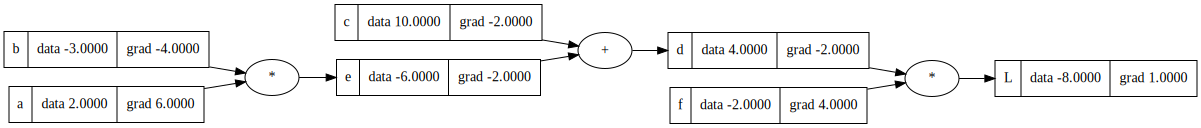

In [ ]:
#manual backprop gradients
#dL/dL = 1.0
L.grad = 1.0

'''
L = d*f
dL/dd = f
dL/df = d
'''
d.grad = -2.0
f.grad = 4.0

'''
local derivative
d = c + e
dd/dc = 1.0
dd/de = 1.0

routes the gradient 

dL/dc = (dL/dd) * (dd/dc)
dL/de = (dL/dd) * (dd/dc)  by symmetry 
'''
c.grad = -2.0
e.grad = -2.0

'''
dL/de = -2.0
dL/da = (dL/de) * (de/da)
e = a + b
de/da = b
b = -3
a.grad = -3.0*-2.0
b.grad = -2.0 * 2.0

'''
a.grad = 6.0
b.grad = -4.0

draw_dot(L)


In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


In [ ]:
#verify the gradients
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  a.data+=h
  b = Value(-3.0, label='b')
  #b.data += h
  
  c = Value(10.0, label='c')
  #c.data+=h
  e = a*b; e.label = 'e'
  #e.data +=h
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()


6.000000000000227


In [ ]:
'''
Neural Networks 
'''

'\nNeural Networks \n'

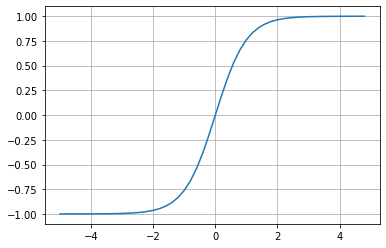

In [ ]:
#tanh or sigmoid activation function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

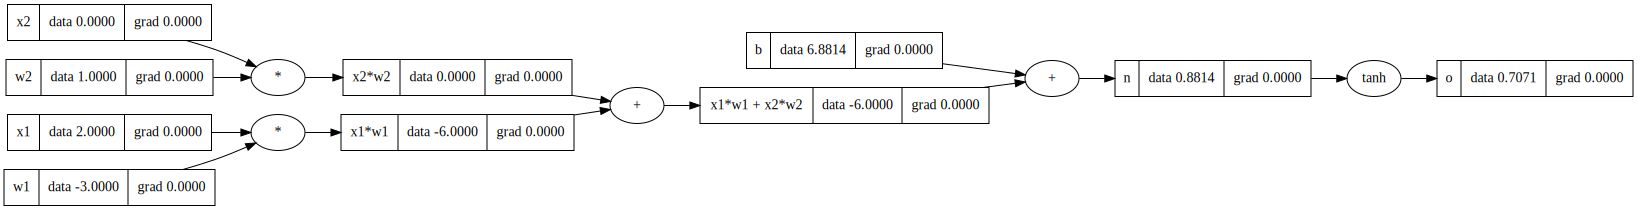

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [ ]:
#manual backrprop for nn
'''
o.grad = 1.0

o = tanh(n)
do/dn = 1 - o**2 

b.grad = 0.5
x1w1x2w2.grad = 0.5
o.grad = 1.0

o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
x1w1.grad = 0.5
x2w2.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5
n.grad = 0.5
o.grad = 1.0
1 - o.data**2

0.4999999
'''


'\no.grad = 1.0\n\no = tanh(n)\ndo/dn = 1 - o**2 \n\nb.grad = 0.5\nx1w1x2w2.grad = 0.5\no.grad = 1.0\n\no._backward()\nn._backward()\nb._backward()\nx1w1x2w2._backward()\nx2w2._backward()\nx1w1._backward()\nx1.grad = w1.data * x1w1.grad\nw1.grad = x1.data * x1w1.grad\nx2.grad = w2.data * x2w2.grad\nw2.grad = x2.data * x2w2.grad\nx1w1.grad = 0.5\nx2w2.grad = 0.5\nx1w1x2w2.grad = 0.5\nb.grad = 0.5\nn.grad = 0.5\no.grad = 1.0\n1 - o.data**2\n\n0.4999999\n'

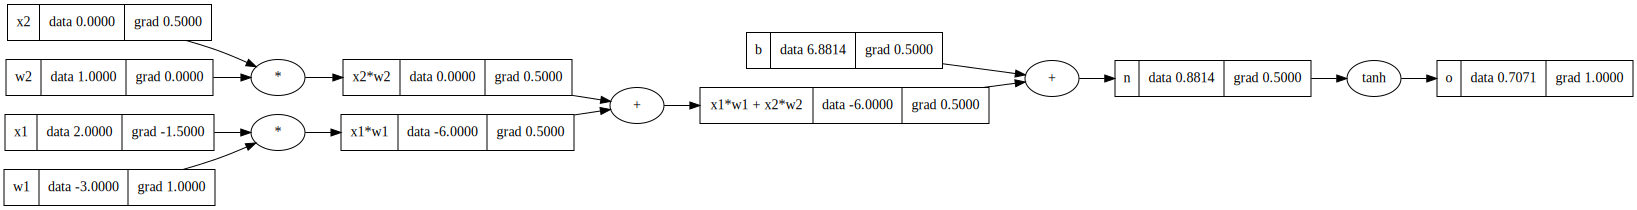

In [ ]:
o.backward()  #does backprop
draw_dot(o)